# Tabular Fastai Classification with Adult Dataset

In [15]:
import pandas as pd

from fastai.tabular import untar_data, URLs
from fastai.tabular import FillMissing, Categorify, Normalize, TabularList, tabular_learner
from fastai.tabular import accuracy

### Unloading sample data to OS default path

In [4]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


### Creating dataset

In [5]:
target_column = 'salary'
categoricals = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
continuous = ['age', 'fnlwgt', 'education-num']
procedures = [FillMissing, Categorify, Normalize]

In [8]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=categoricals, cont_names=continuous)

In [10]:
# Note: Here the validation and test set are same

dataset = (TabularList.from_df(df, path=path, cat_names=categoricals, cont_names=continuous, procs=procedures)
           .split_by_idx(list(range(800,1000)))
           .label_from_df(cols=target_column)
           .add_test(test)
           .databunch())
dataset

TabularDataBunch;

Train: LabelList (32361 items)
x: TabularList
workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; education-num_na False; age 0.7632; fnlwgt -0.8381; education-num 0.7511; ,workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; education-num_na False; age 0.3968; fnlwgt 0.4458; education-num 1.5334; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; education-num_na True; age -0.0430; fnlwgt -0.8868; education-num -0.0312; ,workclass  Self-emp-inc; education  Prof-school; marital-status  Married-civ-spouse; occupation  Prof-specialty; relationship  Husband; race  Asian-Pac-Islander; education-num_na False; age -0.0430; fnlwgt -0.7288; education-num 1.9245; ,workclass  Self-emp-not-inc; education  7th-8th; marital-status  Married-civ-spouse; 

In [13]:
dataset.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Bachelors,Never-married,Craft-repair,Not-in-family,White,False,-0.1163,0.8467,1.1422,<50k
Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.4828,-0.4991,-0.0312,>=50k
Private,Some-college,Never-married,Prof-specialty,Not-in-family,White,False,-0.8493,-0.7378,-0.0312,<50k
Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,1.2030,-0.4847,-0.4224,>=50k
State-gov,Some-college,Divorced,Adm-clerical,Not-in-family,Black,False,0.3968,-0.3370,-0.0312,<50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,1.7894,0.4541,-0.4224,<50k
State-gov,Bachelors,Never-married,Protective-serv,Not-in-family,Black,False,0.1769,3.1127,1.1422,<50k
Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,False,0.2502,-0.7816,-0.0312,>=50k
Private,HS-grad,Married-civ-spouse,Transport-moving,Wife,White,False,-0.1896,1.1078,-0.4224,>=50k
Local-gov,12th,Married-civ-spouse,Handlers-cleaners,Husband,White,False,0.3968,1.8784,-0.8135,<50k


### Modelling

In [16]:
# https://docs.fast.ai/tabular.data.html#tabular_learner

learn = tabular_learner(dataset, layers=[200, 100], metrics=[accuracy])

In [17]:
learn.fit(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.369258,0.395200,0.820000,00:25
1,0.368265,0.383494,0.830000,00:24
2,0.363180,0.369290,0.840000,00:24
3,0.362936,0.369716,0.825000,00:24
4,0.359862,0.372667,0.830000,00:27
5,0.345772,0.362905,0.835000,00:25


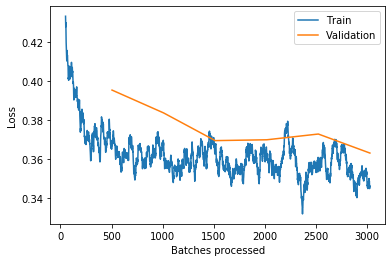

In [24]:
learn.recorder.plot_losses(skip_start=50)

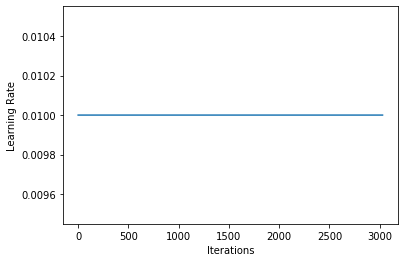

In [21]:
learn.recorder.plot_lr()

### Inference

In [18]:
row = df.iloc[0]

In [19]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4118, 0.5882]))